In [1]:
%matplotlib inline
import numpy as np
from mlp import MLP
import os
import matplotlib.pyplot as plt


def gradient_check(parameter, mlp, perturbation, x, y):
    cost, gradient = mlp.calculate_gradient(x, y)
    gradient = gradient['grad_{}'.format(parameter)]
    numerical_gradient = np.zeros((mlp.params[parameter].shape[0], mlp.params[parameter].shape[1], len(cost)))
    rows, columns = mlp.params[parameter].shape
    for i in range(rows):
        for j in range(columns):
            mlp.params[parameter][i, j] = mlp.params[parameter][i, j] + perturbation
            pert_cost, _ = mlp.calculate_gradient(x, y)
            numerical_gradient[i, j, :] = pert_cost-cost
            mlp.params[parameter][i, j] = mlp.params[parameter][i, j] - perturbation
    numerical_gradient = numerical_gradient/perturbation
    numerical_gradient = np.sum(numerical_gradient, axis=2)
    check = np.divide(numerical_gradient+perturbation*0.001, gradient+perturbation*0.001)
    return numerical_gradient, check


def plot_decision_boundary(clf, x, y, title, save_name):
    fig, ax = plt.subplots()
    x_min, x_max = x[0, :].min() - 0.25, x[0, :].max() + 0.25
    y_min, y_max = x[1, :].min() - 0.25, x[1, :].max() + 0.25
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = clf.predict(np.transpose(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.bwr)
    unique_classes = np.unique(y)
    colors = plt.cm.spring(np.linspace(0, 1, len(unique_classes)))
    for i, class_ in enumerate(unique_classes):
        _, mask = np.where(y == class_)
        ax.scatter(x[0, mask], x[1, mask], c=colors[i], label='Category: {}'.format(class_),
                   s=3, edgecolors='black', linewidths=0.2)
    ax.legend(loc='upper right', framealpha=1)
    ax.grid(True)
    plt.title(title)
    plt.axis("tight")
    # plt.savefig(save_name)
    plt.show()
    

def plot_functions(X, names, ax_names):
    
    epochs = np.arange(0, X.shape[1])
    for i in range(X.shape[0]):
        plt.plot(epochs, X[i, :], label=names[i])
        
    plt.xlabel(ax_names[0])
    plt.ylabel(ax_names[1])
    plt.legend()
    plt.show()


# Experiment 1: Gradient checking for **single** example

In [14]:
inputs = 2
outputs = 2
hidden = 2
n = 1
lambdas = [0.1, 0.1, 0.1, 0.1]
mlp = MLP(inputs, hidden, outputs, lambdas, matrix=False)
x = np.random.rand(inputs, n)
y = np.random.randint(0, outputs, (1, n))
numerical_gradient_w2, check_w2 = gradient_check('w2', mlp, 10e-5, x, y)
numerical_gradient_b2, check_b2 = gradient_check('b2', mlp, 10e-5, x, y)
numerical_gradient_w1, check_w1 = gradient_check('w1', mlp, 10e-5, x, y)
numerical_gradient_b1, check_b1 = gradient_check('b1', mlp, 10e-5, x, y)
experiment_1 = {
        'numerical_gradient_w2': numerical_gradient_w2,
        'grad_w2': mlp.bprop['grad_w2'],
        'check_w2': check_w2,
        'numerical_gradient_b2': numerical_gradient_b2,
        'grad_b2': mlp.bprop['grad_b2'],
        'check_b2': check_b2,
        'numerical_gradient_w1': numerical_gradient_w1,
        'grad_w1': mlp.bprop['grad_w1'],
        'check_w1': check_w1,
        'numerical_gradient_b1': numerical_gradient_b1,
        'grad_b1': mlp.bprop['grad_b1'],
        'check_b1': check_b1}

print(experiment_1)


{'numerical_gradient_w2': array([[-0.16446078, -0.16583046],
       [ 0.15425422, -0.20161083]]), 'grad_w2': array([[-0.16447078, -0.16584046],
       [ 0.15424422, -0.20162083]]), 'check_w2': array([[ 0.9999392 ,  0.9999397 ],
       [ 1.00006483,  0.9999504 ]]), 'numerical_gradient_b2': array([[-0.4999875],
       [ 0.5000125]]), 'grad_b2': array([[-0.5],
       [ 0.5]]), 'check_b2': array([[ 0.999975],
       [ 1.000025]]), 'numerical_gradient_w1': array([[-0.22391392,  0.20219128],
       [ 0.12984512, -0.20746993]]), 'grad_w1': array([[-0.22392392,  0.20218128],
       [ 0.12983512, -0.20747993]]), 'check_w1': array([[ 0.99995534,  1.00004946],
       [ 1.00007702,  0.9999518 ]]), 'numerical_gradient_b1': array([[ 0.],
       [ 0.]]), 'grad_b1': array([[ 0.],
       [ 0.]]), 'check_b1': array([[ 1.],
       [ 1.]])}


Looking at the check_x arrays, we notice that the ratio between the finite differences computation and backpropagation yields values very close to 1.0, which shows how the backprop step is implemented correctly. 

# Experiment 4: gradient checking for **minibatch of size 10**

In [3]:
inputs = 2
outputs = 2
hidden = 8
n = 10
lambdas = [0, 0, 0, 0]
mlp = MLP(inputs, hidden, outputs, lambdas, matrix=False)
x = np.random.rand(inputs, n)
y = np.random.randint(0, outputs, (1, n))
numerical_gradient_w2, check_w2 = gradient_check('w2', mlp, 10e-5, x, y)
numerical_gradient_b2, check_b2 = gradient_check('b2', mlp, 10e-5, x, y)
numerical_gradient_w1, check_w1 = gradient_check('w1', mlp, 10e-5, x, y)
numerical_gradient_b1, check_b1 = gradient_check('b1', mlp, 10e-5, x, y)
experiment_2 = {
        'numerical_gradient_w2': numerical_gradient_w2,
        'grad_w2': mlp.bprop['grad_w2'],
        'check_w2': check_w2,
        'numerical_gradient_b2': numerical_gradient_b2,
        'grad_b2': mlp.bprop['grad_b2'],
        'check_b2': check_b2,
        'numerical_gradient_w1': numerical_gradient_w1,
        'grad_w1': mlp.bprop['grad_w1'],
        'check_w1': check_w1,
        'numerical_gradient_b1': numerical_gradient_b1,
        'grad_b1': mlp.bprop['grad_b1'],
        'check_b1': check_b1}

print(experiment_2)

{'numerical_gradient_w2': array([[ 0.0359035 ,  0.        ,  0.08839758,  0.13414904,  0.58530901,
         0.24880578,  0.67310225,  0.32571193],
       [-0.03590341,  0.        , -0.08839493, -0.13414854, -0.58526261,
        -0.24880383, -0.67303657, -0.32570354]]), 'grad_w2': array([[ 0.03590422,  0.        ,  0.03187382,  0.06522319,  0.21284506,
         0.13214308,  0.24463873,  0.11896073],
       [-0.03590422, -0.        , -0.03187382, -0.06522319, -0.21284506,
        -0.13214308, -0.24463873, -0.11896073]]), 'check_w2': array([[ 1.00000121,  1.        ,  1.00001499,  1.00000188,  1.00003964,
         1.00000393,  1.00004879,  1.00001288],
       [ 0.99999879,  1.        ,  0.99998501,  0.99999812,  0.99996036,
         0.99999607,  0.9999512 ,  0.99998712]]), 'numerical_gradient_b2': array([[ 0.88039299],
       [-0.88015222]]), 'grad_b2': array([[ 0.59755694],
       [-0.59755694]]), 'check_b2': array([[ 1.00013676],
       [ 0.99986324]]), 'numerical_gradient_w1': array([[

Similarly to the above experiment, gradient checking with a batch size of 10 yields rations close to 1.0. 

# Experiment 5: Decisioun boundaries on the two circles dataset

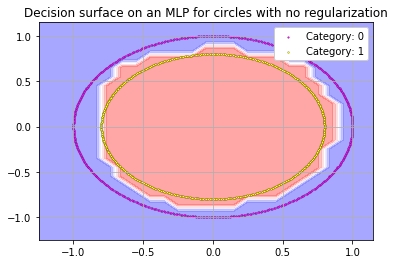

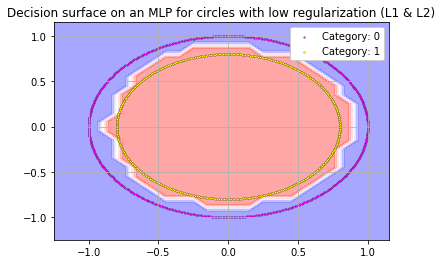

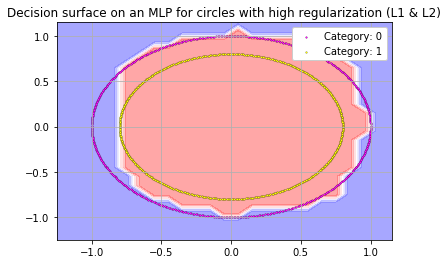

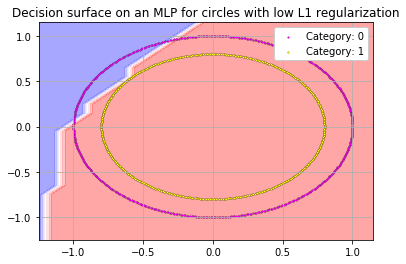

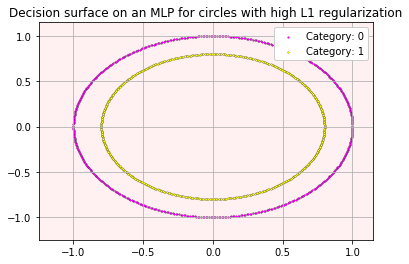

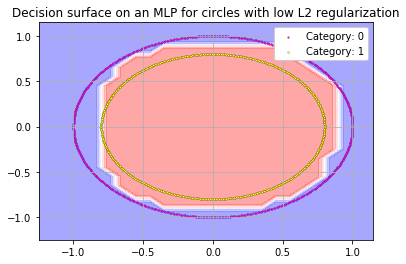

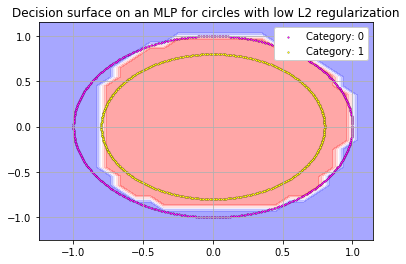

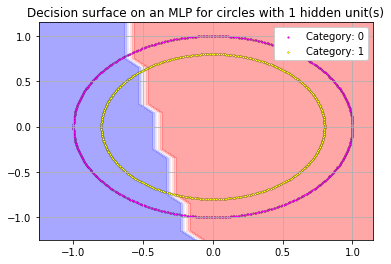

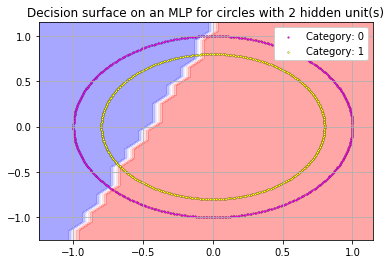

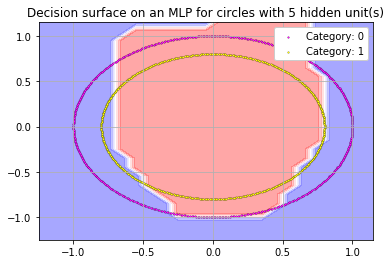

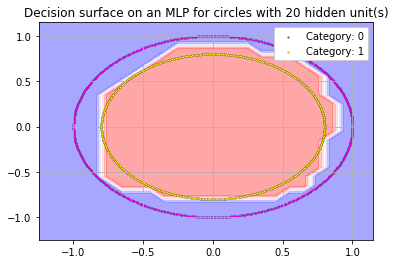

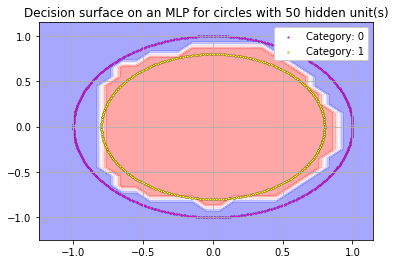

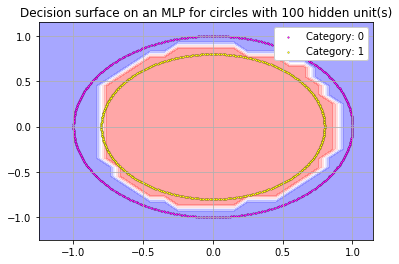

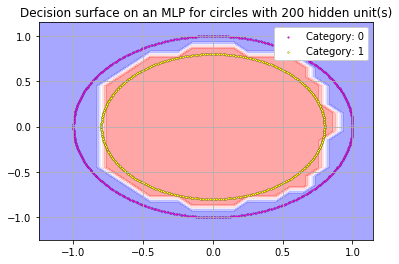

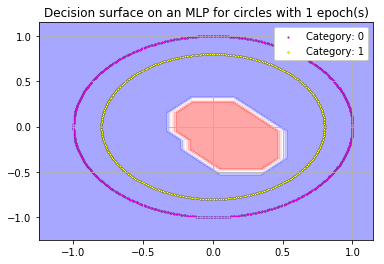

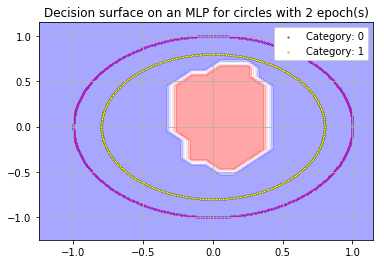

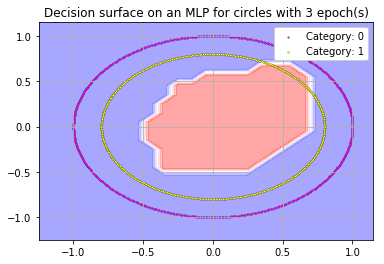

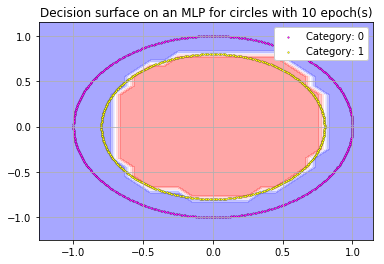

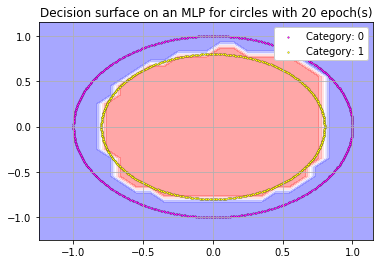

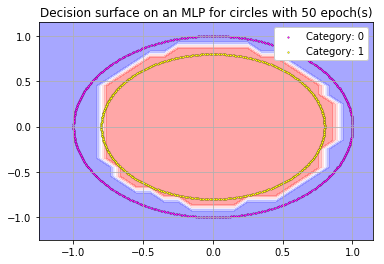

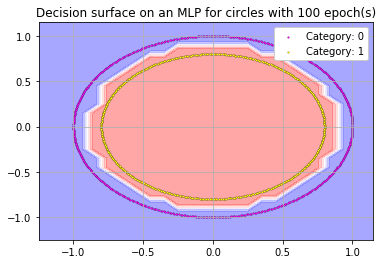

In [2]:
# constants
save_dir = os.path.join('results', 'experiment5')

# Load data
circle = np.loadtxt(os.path.join('data', 'circles.txt'))
x = circle[:, :-1].T
y = np.clip(circle[:, -1].T.reshape(1, -1), 0, 1).astype(int)

# Varying weight decay
lr = 0.001
lambdas = [([0.0, 0.0, 0.0, 0.0], 'Decision surface on an MLP for circles with no regularization'),
           ([0.002, 0.0002, 0.002, 0.002], 'Decision surface on an MLP for circles with low regularization (L1 & L2)'),
           ([0.005, 0.005, 0.005, 0.005], 'Decision surface on an MLP for circles with high regularization (L1 & L2)'),
           ([0.01, 0.0, 0.01, 0.0], 'Decision surface on an MLP for circles with low L1 regularization'),
           ([0.015, 0.0, 0.015, 0.0], 'Decision surface on an MLP for circles with high L1 regularization'),
           ([0.0, 0.015, 0.0, 0.015], 'Decision surface on an MLP for circles with low L2 regularization'),
           ([0.0, 0.02, 0.0, 0.02], 'Decision surface on an MLP for circles with low L2 regularization')]
hidden = 200
epochs = 50
batch_size = 500
for i, (lambda_, title) in enumerate(lambdas):
    inputs = len(x)
    outputs = len(np.unique(y))
    mlp = MLP(inputs, hidden, outputs, lambda_)
    mlp.fit(x, y, batch_size, epochs, lr)
    name = os.path.join(save_dir, 'lambda', 'lambda_{}'.format(i))
    plot_decision_boundary(mlp, x, y, title, name)

# Varying number of hidden units
lr = 0.001
lambdas = [0.001, 0.0001, 0.001, 0.001]
hiddens = [1, 2, 5, 20, 50, 100, 200]
epochs = 50
batch_size = 500
for i, hidden in enumerate(hiddens):
    inputs = len(x)
    outputs = len(np.unique(y))
    mlp = MLP(inputs, hidden, outputs, lambdas)
    mlp.fit(x, y, batch_size, epochs, lr)
    # name = os.path.join(save_dir, 'hidden', 'hidden_{}'.format(i))
    title = 'Decision surface on an MLP for circles with {} hidden unit(s)'.format(hidden)
    plot_decision_boundary(mlp, x, y, title, name)

# Varying number of epochs
lr = 0.001
lambdas = [0.001, 0.0001, 0.001, 0.001]
hidden = 100
epochs = [1, 2, 3, 10, 20, 50, 100]
batch_size = 500
for i, epoch in enumerate(epochs):
    inputs = len(x)
    outputs = len(np.unique(y))
    mlp = MLP(inputs, hidden, outputs, lambdas)
    mlp.fit(x, y, batch_size, epoch, lr)
    # name = os.path.join(save_dir, 'epochs', 'epochs_{}'.format(i))
    title = 'Decision surface on an MLP for circles with {} epoch(s)'.format(epoch)
    plot_decision_boundary(mlp, x, y, title, name)


Notice how increasing regularization, running the MLP for a low number of epochs, and having few hidden units shrinks the size of the decision boundary. In that sense, all of these factors decrease the capacity of the MLP. 

# Experiment 7: Matrix forms versus loops gradient checking

In [15]:
for n in [1, 10]:
    inputs = 2
    outputs = 1
    hidden = 2
    lambdas = [0.19, 0.45, 0.12, 0.3]
    x = np.random.rand(inputs, n)
    y = np.random.randint(0, outputs, (1, n))

    # Loop form
    mlp = MLP(inputs, hidden, outputs, lambdas, matrix=False)
    numerical_gradient_w2, check_w2 = gradient_check('w2', mlp, 10e-5, x, y)
    numerical_gradient_b2, check_b2 = gradient_check('b2', mlp, 10e-5, x, y)
    numerical_gradient_w1, check_w1 = gradient_check('w1', mlp, 10e-5, x, y)
    numerical_gradient_b1, check_b1 = gradient_check('b1', mlp, 10e-5, x, y)
    experiment_7_loop = {
        'numerical_gradient_w2': numerical_gradient_w2,
        'grad_w2': mlp.bprop['grad_w2'],
        'check_w2': check_w2,
        'numerical_gradient_b2': numerical_gradient_b2,
        'grad_b2': mlp.bprop['grad_b2'],
        'check_b2': check_b2,
        'numerical_gradient_w1': numerical_gradient_w1,
        'grad_w1': mlp.bprop['grad_w1'],
        'check_w1': check_w1,
        'numerical_gradient_b1': numerical_gradient_b1,
        'grad_b1': mlp.bprop['grad_b1'],
        'check_b1': check_b1}

    # Matrix form
    mlp = MLP(inputs, hidden, outputs, lambdas)
    numerical_gradient_w2, check_w2 = gradient_check('w2', mlp, 10e-5, x, y)
    numerical_gradient_b2, check_b2 = gradient_check('b2', mlp, 10e-5, x, y)
    numerical_gradient_w1, check_w1 = gradient_check('w1', mlp, 10e-5, x, y)
    numerical_gradient_b1, check_b1 = gradient_check('b1', mlp, 10e-5, x, y)
    experiment_7_matrix = {
        'numerical_gradient_w2': numerical_gradient_w2,
        'grad_w2': mlp.bprop['grad_w2'],
        'check_w2': check_w2,
        'numerical_gradient_b2': numerical_gradient_b2,
        'grad_b2': mlp.bprop['grad_b2'],
        'check_b2': check_b2,
        'numerical_gradient_w1': numerical_gradient_w1,
        'grad_w1': mlp.bprop['grad_w1'],
        'check_w1': check_w1,
        'numerical_gradient_b1': numerical_gradient_b1,
        'grad_b1': mlp.bprop['grad_b1'],
        'check_b1': check_b1}
    
    print(experiment_7_loop)

    print(experiment_7_matrix)

{'numerical_gradient_w2': array([[-0.38513988, -0.47123248]]), 'grad_w2': array([[-0.38516988, -0.47126248]]), 'check_w2': array([[ 0.99992211,  0.99993634]]), 'numerical_gradient_b2': array([[ 0.]]), 'grad_b2': array([[ 0.]]), 'check_b2': array([[ 1.]]), 'numerical_gradient_w1': array([[-0.25842878,  0.23127079],
       [ 0.59674978,  0.56582312]]), 'grad_w1': array([[-0.25847378,  0.23122579],
       [ 0.59670478,  0.56577812]]), 'check_w1': array([[ 0.9998259 ,  1.00019461],
       [ 1.00007541,  1.00007954]]), 'numerical_gradient_b1': array([[ 0.],
       [ 0.]]), 'grad_b1': array([[ 0.],
       [ 0.]]), 'check_b1': array([[ 1.],
       [ 1.]])}
{'numerical_gradient_w2': array([[ 0.53217989, -0.47264862]]), 'grad_w2': array([[ 0.53214989, -0.47267862]]), 'check_w2': array([[ 1.00005638,  0.99993653]]), 'numerical_gradient_b2': array([[ 0.]]), 'grad_b2': array([[ 0.]]), 'check_b2': array([[ 1.]]), 'numerical_gradient_w1': array([[-0.76904285, -0.61727478],
       [ 0.55329156, -0.70

Checking the gradients again shows how the ratios are all close to 1. 

Experiment 8: Fashion MNIST timing

In [2]:
import sys
import time
sys.path.append('../fashion-mnist/utils')
import mnist_reader

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')

# transpose to match dims to mlp expected format
X_train = X_train.T
y_train = np.expand_dims(y_train, axis=-1).T

d = 784
K = 100
dh = 10
m = 10
lambdas = [0.01, 0.01, 0.01, 0.01]
mlp_m = MLP(d, dh, m, lambdas, matrix=True)
mlp_l = MLP(d, dh, m, lambdas, matrix=False)

start_m = time.time()
mlp_m.fit(X_train, y_train, K, 1, 1e-5)
stop_m = time.time()

matrix_time = stop_m - start_m
print('Time elapsed for 1 epoch using matrix forms: {a:.3f} seconds'.format(a=matrix_time))

start_l = time.time()
mlp_l.fit(X_train, y_train, K, 1, 1e-5)
stop_l = time.time()
loop_time = stop_l - start_l
print('Time elapsed for 1 epoch using loop: {a:.3f} seconds'.format(a=loop_time))

Time elapsed for 1 epoch using matrix forms: 1.212 seconds


Time elapsed for 1 epoch using loop: 16.811 seconds


As expected, the matrix form speeds up training significantly.

# Experiment 10: Error and loss functions on train/val/test 

In [3]:
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')
X_test = X_test.T
y_test = np.expand_dims(y_test, axis=-1).T
# Test/val splitting is done on the test set using a 70/30 split
X_val = X_test[:, 0:3000]
y_val = y_test[:, 0:3000]

X_test = X_test[:, 3000:]
y_test = y_test[:, 3000:]

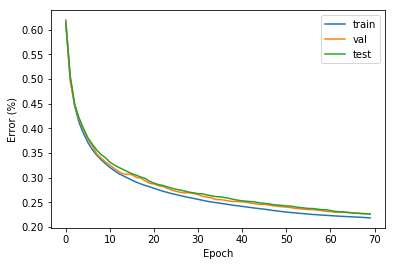

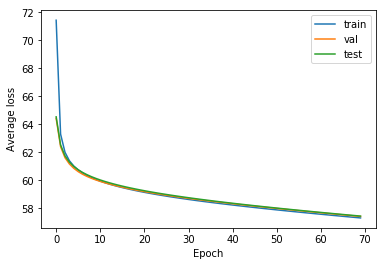

In [12]:
dh = 400
lambdas = [0.01, 0.01, 0, 0.01]
mlp_m = MLP(d, dh, m, lambdas, matrix=True, verbose=False)

losses, errors = mlp_m.fit(X_train, y_train, K, 70, 1e-8, X_val, y_val, X_test, y_test)

train_cost = np.expand_dims(np.asarray(losses['train']), axis=0)
train_error = np.expand_dims(np.asarray(errors['train']), axis=0)
val_cost = np.expand_dims(np.asarray(losses['val']), axis=0)
val_error = np.expand_dims(np.asarray(errors['val']), axis=0)
test_cost = np.expand_dims(np.asarray(losses['test']), axis=0)
test_error = np.expand_dims(np.asarray(errors['test']), axis=0)

costs = np.vstack((train_cost, val_cost, test_cost))
errors = np.vstack((train_error, val_error, test_error))

plot_functions(errors, ['train', 'val', 'test'], ['Epoch', 'Error (%)'])
plot_functions(costs, ['train', 'val', 'test'], ['Epoch', 'Average loss'])